In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy.optimize import leastsq
import random
import math


In [2]:
data1 = pd.read_excel('./data1.xlsx',index_col="id")
data2 = pd.read_excel('./data2.xlsx',index_col="id")
data3 = pd.read_excel('./data3.xlsx',index_col="id")

In [3]:
data1

,Woody plant species,Site,Years decayed,Mesh,Sampling side,Extension rate,Mass loss
id,,,,,,,
1,Celtis occidentalis,2,3,present,both,1.10,29.8
2,Celtis occidentalis,6,3,absent,both,0.92,33.0
3,Celtis occidentalis,6,3,present,both,9.90,45.7
4,Celtis occidentalis,7,3,absent,bottom,13.54,49.0
5,Celtis occidentalis,7,3,present,both,15.41,67.4
...,...,...,...,...,...,...,...
69,Quercus velutina,7,5,absent,bottom,1.90,63.2
70,Ulmus rubra,2,5,absent,bottom,0.34,54.3
71,Ulmus rubra,6,5,absent,both,0.26,44.5


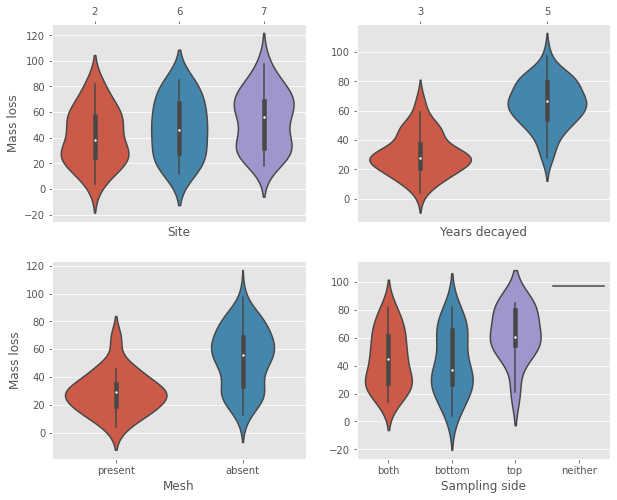

In [4]:
f=plt.figure(figsize=(10,8))
f.add_subplot(2,2,1)
sns.violinplot(x="Site", y="Mass loss",data=data1)
ax = plt.gca()
ax.xaxis.set_ticks_position("top")
f.add_subplot(2,2,2)
sns.violinplot(x="Years decayed", y="Mass loss",data=data1)
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_ticks_position("top")
f.add_subplot(2,2,3)
sns.violinplot(x="Mesh", y="Mass loss",data=data1)
f.add_subplot(2,2,4)
sns.violinplot(x="Sampling side", y="Mass loss",data=data1)
plt.ylabel('')
plt.savefig("fig1.jpg",dpi=500,bbox_inches="tight")
plt.show()


<Figure size 1080x1080 with 0 Axes>

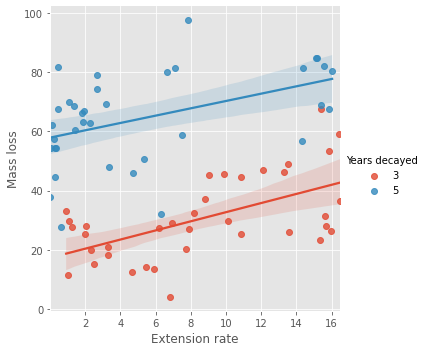

In [5]:
plt.figure(figsize=(15, 15))
sns.lmplot(x="Extension rate", y="Mass loss",data=data1,hue="Years decayed")
plt.savefig("fig.jpg",dpi=500,bbox_inches="tight")
plt.show()

In [6]:
x = np.array(data1.loc[data1["Years decayed"] == 3,"Extension rate"])
y = np.array(data1.loc[data1["Years decayed"] == 3,"Mass loss"])
z1 = np.polyfit(x, y, 1)
p = np.poly1d(z1,variable='x')
y_pred = p(x)
print("Years decayed == 3" + str(p))
correlation = np.corrcoef(y, y_pred)[0,1]  #相关系数
correlation**2   #R方

Years decayed == 3 
1.54 x + 17.31


0.33737307718004217

In [7]:
x = np.array(data1.loc[data1["Years decayed"] == 5,"Extension rate"])
y = np.array(data1.loc[data1["Years decayed"] == 5,"Mass loss"])
z1 = np.polyfit(x, y, 1)
p = np.poly1d(z1,variable='x')
y_pred = p(x)
print("Years decayed == 5" + str(p))
correlation = np.corrcoef(y, y_pred)[0,1]  #相关系数
correlation**2   #R方

Years decayed == 5 
1.237 x + 57.87


0.2049196632577307

In [8]:
data2

,name,Hyphal extension rate,Decomposition rate,Temperature
id,,,,
1,Armillaria_gallica_FP102531_C6D,0.30,4.07,10
2,Armillaria_gallica_EL8_A6F,0.18,3.20,10
3,Armillaria_gallica_FP102534_A5A,0.26,2.94,10
4,Armillaria_gallica_FP102535_A5D,0.16,3.78,10
5,Armillaria_gallica_FP102542_A5B,0.20,2.35,10
...,...,...,...,...
98,Pycnoporus_sanguineus_PR_SC_95_A11C,7.26,37.43,22
99,Schizophyllum_commune_TJV93_5_A10A,7.40,12.69,22
100,Schizophyllum_commune_PR1117,4.60,6.87,22


<Figure size 1080x1080 with 0 Axes>

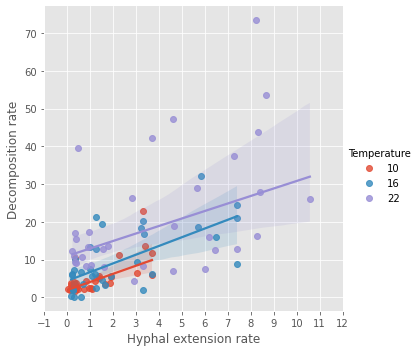

In [9]:
plt.figure(figsize=(15, 15))
sns.lmplot(x="Hyphal extension rate", y="Decomposition rate",data=data2,hue='Temperature',robust=True)
plt.xticks(np.arange(-1,13,1))
plt.savefig("fig3.jpg",dpi=500,bbox_inches="tight")
plt.show()


In [10]:
x = np.array(data2.loc[data2["Temperature"] == 10,"Hyphal extension rate"])
y = np.array(data2.loc[data2["Temperature"] == 10,"Decomposition rate"])
z1 = np.polyfit(x, y, 1)
p = np.poly1d(z1,variable='x')
y_pred = p(x)
print("Temperature == 10" + str(p))
correlation = np.corrcoef(y, y_pred)[0,1]  #相关系数
correlation**2   #R方

Temperature == 10 
2.73 x + 1.855


0.5008683360928852

In [11]:
x = np.array(data2.loc[data2["Temperature"] == 16,"Hyphal extension rate"])
y = np.array(data2.loc[data2["Temperature"] == 16,"Decomposition rate"])
z1 = np.polyfit(x, y, 1)
p = np.poly1d(z1,variable='x')
y_pred = p(x)
print("Temperature == 16" + str(p))
correlation = np.corrcoef(y, y_pred)[0,1]  #相关系数
correlation**2   #R方

Temperature == 16 
2.247 x + 4.799


0.4147195461981735

In [12]:
x = np.array(data2.loc[data2["Temperature"] == 22,"Hyphal extension rate"])
y = np.array(data2.loc[data2["Temperature"] == 22,"Decomposition rate"])
z1 = np.polyfit(x, y, 1)
p = np.poly1d(z1,variable='x')
y_pred = p(x)
print("Temperature == 22" + str(p))
correlation = np.corrcoef(y, y_pred)[0,1]  #相关系数
correlation**2   #R方

Temperature == 22 
2.509 x + 11.48


0.25106810571502536

In [13]:
data3

,name,Decomposition rate mean,ranking,water.niche.width
id,,,,
1,Armillaria_gallica_FP102531_C6D,8.93,0.054054,3.01
2,Armillaria_gallica_EL8_A6F,4.54,0.027027,2.08
3,Armillaria_gallica_FP102534_A5A,5.81,0.054054,3.71
4,Armillaria_gallica_FP102535_A5D,6.95,0.054054,4.30
5,Armillaria_gallica_FP102542_A5B,5.03,0.135135,2.57
6,Armillaria_gallica_HHB12551_C6C,2.04,0.000000,4.15
7,Armillaria_gallica_OC1_A6E,3.44,0.027027,2.36
8,Armillaria_gallica_SH1_A4A,2.00,0.162162,2.04
9,Armillaria_sinapina_PR9,4.58,0.135135,1.74


<Figure size 1080x1080 with 0 Axes>

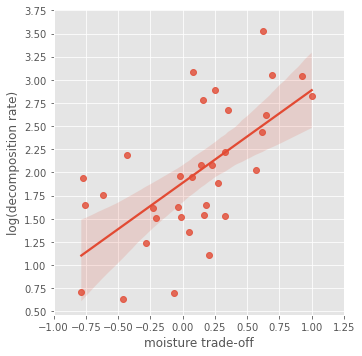

In [14]:
plt.figure(figsize=(15, 15))
data3['moisture trade-off'] = data3['ranking'] - (data3['water.niche.width'] - min(data3['water.niche.width'])) / (max(data3['water.niche.width']) - min(data3['water.niche.width']))
data3['log(decomposition rate)'] = np.log(data3['Decomposition rate mean'])
sns.lmplot(x="moisture trade-off", y="log(decomposition rate)",data=data3)
plt.xticks(np.arange(-1,1.5,0.25))
plt.yticks(np.arange(0.5,4,0.25))
plt.savefig("fig4.jpg",dpi=500,bbox_inches="tight")
plt.show()

In [15]:
data3

,name,Decomposition rate mean,ranking,water.niche.width,moisture trade-off,log(decomposition rate)
id,,,,,,
1,Armillaria_gallica_FP102531_C6D,8.93,0.054054,3.01,-0.428705,2.189416
2,Armillaria_gallica_EL8_A6F,4.54,0.027027,2.08,-0.209047,1.512927
3,Armillaria_gallica_FP102534_A5A,5.81,0.054054,3.71,-0.614381,1.759581
4,Armillaria_gallica_FP102535_A5D,6.95,0.054054,4.30,-0.770880,1.938742
5,Armillaria_gallica_FP102542_A5B,5.03,0.135135,2.57,-0.230913,1.615420
6,Armillaria_gallica_HHB12551_C6C,2.04,0.000000,4.15,-0.785146,0.712950
7,Armillaria_gallica_OC1_A6E,3.44,0.027027,2.36,-0.283318,1.235471
8,Armillaria_gallica_SH1_A4A,2.00,0.162162,2.04,-0.063302,0.693147
9,Armillaria_sinapina_PR9,4.58,0.135135,1.74,-0.010753,1.521699


In [16]:
x = np.array(data3["moisture trade-off"])
y = np.array(data3["log(decomposition rate)"])
z1 = np.polyfit(x, y, 1)
p = np.poly1d(z1,variable='x')
y_pred = p(x)
print(str(p))
correlation = np.corrcoef(y, y_pred)[0,1]  #相关系数
correlation**2   #R方

 
1 x + 1.888


0.3990936892385178

In [17]:
data4 = pd.concat([data2.loc[data2['Temperature'] == 10,["Hyphal extension rate"]],data3.loc[:,["moisture trade-off","log(decomposition rate)"]]],axis=1)
data4["Hyphal extension rate"] = np.log(data4["Hyphal extension rate"])
data4.rename(columns=({"Hyphal extension rate":"log(Hyphal extension rate)"}),inplace=True)

In [18]:
X = data4.iloc[:,0:2]
y = data4.iloc[:,2]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)
lr = LinearRegression()
lr.fit(train_X, train_y)
print(f"权重：{lr.coef_}")
print(f"截距：{lr.intercept_}")
y_hat = lr.predict(test_X)
print(f"均方误差：{mean_squared_error(test_y, y_hat)}")
print(f"训练集R^2：{lr.score(train_X, train_y)}")
print(f"测试集R^2：{lr.score(test_X, test_y)}")


权重：[0.37272486 0.37259309]
截距：2.066333341115313
均方误差：0.3362542350333099
训练集R^2：0.6109639929664399
测试集R^2：-0.030961691988902196


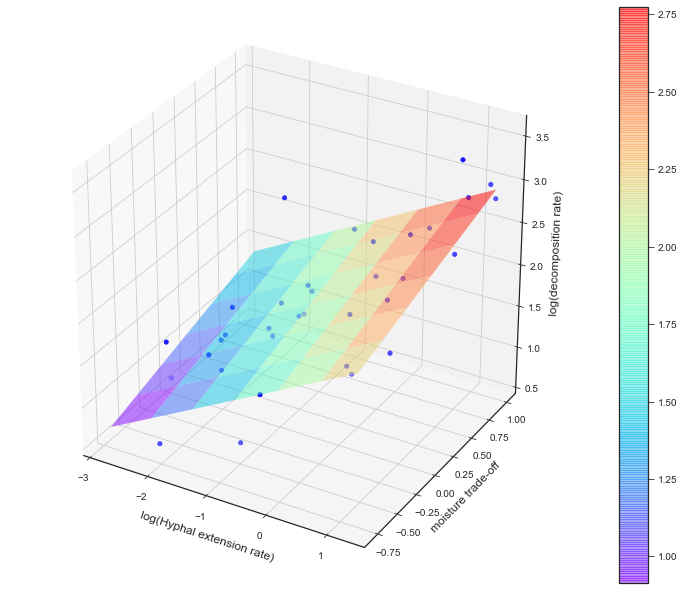

In [19]:
plt.style.use("seaborn-ticks")
max1, max2 = np.max(X, axis=0)
min1, min2 = np.min(X, axis=0)
x1 = np.linspace(min1, max1, 30)
x2 = np.linspace(min2, max2, 30)
X1, X2 = np.meshgrid(x1, x2)
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(data4.iloc[:,0], data4.iloc[:,1], y, color="b")
surf = ax.plot_surface(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        rstride=5, cstride=5, cmap=plt.cm.rainbow, alpha=0.5)
ax.set_xlabel('log(Hyphal extension rate)')
ax.set_ylabel('moisture trade-off')
ax.set_zlabel('log(decomposition rate)')
fig.colorbar(surf)
plt.savefig("fig5.jpg",dpi=500,bbox_inches="tight")
plt.show()


In [20]:
plt.style.use('ggplot')
t = np.arange(0,150,1)
def deriv(w,t,r1,k1,a,r2,k2,b): 
    x,y = w
    return np.array([ r1*x*(1-x/k1-a/k1*y), r2*y*(1-y/k2-b/k2*x)])
def draw(p):
    r1,k1,a,r2,k2,b,x0,y0=p
    yinit = np.array([x0,y0])
    yyy = odeint(deriv,yinit,t,args=(r1,k1,a,r2,k2,b))
    plt.plot(t,yyy[:,0],"b-",label="Fungus 1")
    plt.plot(t,yyy[:,1],"r-",label="Fungus 2")
    plt.xlabel('Time')
    plt.ylabel('Quantity')
    plt.legend()

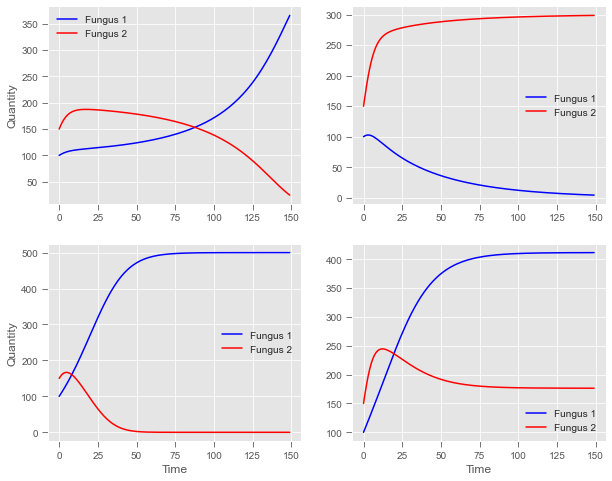

In [21]:
f=plt.figure(figsize=(10,8))
f.add_subplot(2,2,1)
p = [0.1, 500, 2, 0.3, 300, 1, 100, 150]
draw(p)
plt.xlabel('')
f.add_subplot(2,2,2)
p = [0.1, 500, 2, 0.3, 300, 0.3, 100, 150]
draw(p)
plt.xlabel('')
plt.ylabel('')
f.add_subplot(2,2,3)
p = [0.1, 500, 0.5, 0.3, 300, 1, 100, 150]
draw(p)
f.add_subplot(2,2,4)
p = [0.1, 500, 0.5, 0.3, 300, 0.3, 100, 150]
draw(p)
plt.ylabel('')
plt.savefig("fig7.jpg",dpi=500,bbox_inches="tight")

In [22]:
def R():
    return np.random.randn()
def Xapp():
    return x[-1] + x[-1]*(r10-r11*C()-a11*x[-1])*dt-x[-1]*a12*y[-1]*dt+s1*x[-1]*math.sqrt(dt)*R()+math.pow(s1*x[-1],2)*(math.pow(R(),2)*dt-dt)/2
def Yapp():
    return y[-1] + y[-1]*(r20-r21*C()-a21*y[-1])*dt-y[-1]*a22*y[-1]*dt+s2*y[-1]*math.sqrt(dt)*R()+math.pow(s2*y[-1],2)*(math.pow(R(),2)*dt-dt)/2

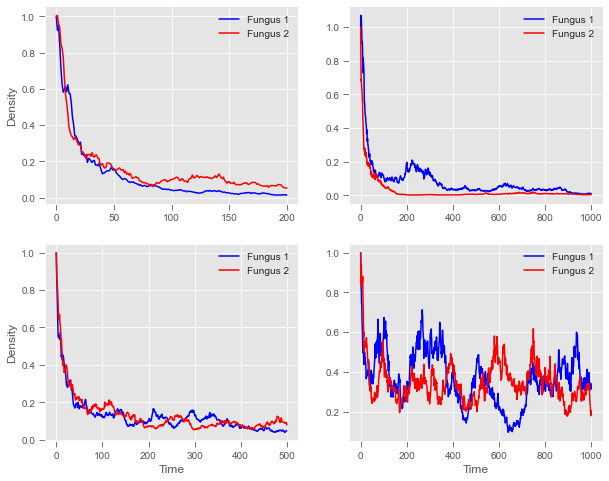

In [23]:
f=plt.figure(figsize=(10,8))
f.add_subplot(2,2,1)
a11=0.5
a21=0.4
a12=0.5
a22=0.5
dt=0.1
r10=0.1
r20=0.055
s1=0.2
s2=0.2
r11=0.61
r21=0.6
def C():
    return 0.2+0.01*math.sin(dt*t[-1])
x = [1]
y = [1]
t = [0]
for i in range(200):
    x.append(Xapp())
    y.append(Yapp())
    t.append(t[-1]+1)
plt.plot(t,x,"b-",label="Fungus 1")
plt.plot(t,y,"r-",label="Fungus 2")
plt.xlabel('')
plt.ylabel('Density')
plt.legend()

f.add_subplot(2,2,2)
def C():
    return 0.1+0.01*math.sin(dt*t[-1])
x = [1]
y = [1]
t = [0]
for i in range(1000):
    x.append(Xapp())
    y.append(Yapp())
    t.append(t[-1]+1)
plt.plot(t,x,"b-",label="Fungus 1")
plt.plot(t,y,"r-",label="Fungus 2")
plt.xlabel('')
plt.ylabel('')
plt.legend()

f.add_subplot(2,2,3)
def C():
    return 0.001+0.001*math.sin(dt*t[-1])
x = [1]
y = [1]
t = [0]
for i in range(500):
    x.append(Xapp())
    y.append(Yapp())
    t.append(t[-1]+1)
plt.plot(t,x,"b-",label="Fungus 1")
plt.plot(t,y,"r-",label="Fungus 2")
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

f.add_subplot(2,2,4)
r10=0.4
r20=0.3
s1=0.2
s2=0.2
r11=0.2
r21=0.1
def C():
    return 0.005+0.001*math.sin(dt*t[-1])
x = [1]
y = [1]
t = [0]
for i in range(1000):
    x.append(Xapp())
    y.append(Yapp())
    t.append(t[-1]+1)
plt.plot(t,x,"b-",label="Fungus 1")
plt.plot(t,y,"r-",label="Fungus 2")
plt.xlabel('Time')
plt.ylabel('')
plt.legend()
plt.savefig("fig8.jpg",dpi=500,bbox_inches="tight")



In [135]:
t = np.arange(0,100,1)
total = 0
def deriv(w,t,a1,a2,a3,b1,b2,b3,c1,c2,c3,d1,d2,d3,a11,a21,a31,b11,b21,b31,c11,c21,c31,d11,d21,d31):
    global total
    total += 1
    x,y,z = w
    if total % 2 == 1:
        return np.array([x*(a1-b1*x-c1*z-d1*y), y*(a2-b2*y-c2*z-d2*x),z*(a3-b3*z+c3*x+d3*y)])
    else:
        return np.array([x*(a11-b11*x-c11*z+d11*y), y*(a21-b21*y-c21*z+d21*x),z*(a31-b31*z+c31*x+d31*y)])
    
def draw(p):
    a1,a2,a3,b1,b2,b3,c1,c2,c3,d1,d2,d3,a11,a21,a31,b11,b21,b31,c11,c21,c31,d11,d21,d31,x0,y0,z0=p
    yinit = np.array([x0,y0,z0])
    yyy = odeint(deriv,yinit,t,args=(a1,a2,a3,b1,b2,b3,c1,c2,c3,d1,d2,d3,a11,a21,a31,b11,b21,b31,c11,c21,c31,d11,d21,d31))
    plt.plot(t,yyy[:,0],"b-",label="Fungus 1")
    plt.plot(t,yyy[:,1],"r-",label="Fungus 2")
    plt.plot(t,yyy[:,2],"y-",label="Fungus 3")
    plt.xlabel('Time')
    plt.ylabel('Density')
    plt.legend()